Jupyter Lab tutorial: https://www.youtube.com/watch?v=A5YyoCKxEOU

Cheatsheet: https://cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

In [646]:
import numpy as np
import pandas as pd
# import psycopg2

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
# from sklearn.metrics import classification_report
# from sklearn.linear_model import LogisticRegression

# from datetime import date, datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.max_columns = None # show all columns of the dat 

from sklearn.feature_selection import RFE
from imblearn.over_sampling import SVMSMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report,roc_auc_score,plot_confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import joblib

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/piotr/Library/Python/3.7/lib/python/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/piotr/Library/Python/3.7/lib/python/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [577]:
# Read from csv:
df_original = pd.read_csv('churn_prediction_customer.csv', sep=',')
df_original.head()

,#,is_tester,customer_id,customer_is_fleet,customer_country,customer_status,first_subscription_start_dt,max_subscription_cancelled_dt,reference_dt,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_6_mths,billing_every_3_mths,billing_every_1_mths,has_discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other
0,1,False,10026175,True,DE,active,2017-01-31,NaN,2021-12-07,NaN,True,NaN,True,NaN,NaN,NaN,True,42.93,42.93,NaN,NaN,NaN,NaN
1,2,False,10052946,True,DE,non_renewing,2017-11-09,2020-10-13,2020-10-13,NaN,True,NaN,True,NaN,NaN,NaN,NaN,31.80,31.80,NaN,NaN,NaN,NaN
2,3,False,10229552,True,DE,non_renewing,2017-01-01,2021-08-26,2021-08-26,NaN,True,NaN,True,NaN,NaN,NaN,True,40.55,40.55,NaN,NaN,NaN,NaN
3,4,False,10270919,True,DE,active,2018-01-01,2018-03-05,2018-03-05,NaN,True,NaN,True,NaN,NaN,NaN,True,57.24,57.24,NaN,NaN,NaN,NaN
4,5,False,10334328,True,DE,active,2017-06-06,NaN,2021-12-07,NaN,True,NaN,True,NaN,NaN,NaN,True,35.45,13.52,NaN,21.93,NaN,NaN


In [578]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   #                              8163 non-null   int64  
 1   is_tester                      8163 non-null   bool   
 2   customer_id                    8163 non-null   object 
 3   customer_is_fleet              8163 non-null   bool   
 4   customer_country               8163 non-null   object 
 5   customer_status                8163 non-null   object 
 6   first_subscription_start_dt    8163 non-null   object 
 7   max_subscription_cancelled_dt  1742 non-null   object 
 8   reference_dt                   8163 non-null   object 
 9   subscription_length_36_mths    1534 non-null   object 
 10  subscription_length_12_mths    6503 non-null   object 
 11  subscription_length_1_mths     132 non-null    object 
 12  billing_every_12_mths          7433 non-null   o

### ---

### Create a copy of the original data frame:

In [579]:
df = df_original.copy()

### Drop columns: 
##### 1. Having only 1 unique value OR all values are unique:

In [580]:
# Drop columns which have only 1 unique value OR all values are unique
columns_to_drop = []

for col in df.columns:
    if df[col].nunique(dropna = False) in (1, df.shape[0]):
        columns_to_drop.append(col)
        
columns_to_drop        

['#', 'customer_id', 'customer_is_fleet', 'billing_every_6_mths']

In [581]:
df.drop(columns_to_drop, axis=1, inplace=True)

##### 2. Irrelevant for ML model:

In [582]:
df.drop('customer_status', axis=1, inplace=True)

### Rename columns:

In [583]:
df.columns

Index(['is_tester', 'customer_country', 'first_subscription_start_dt',
       'max_subscription_cancelled_dt', 'reference_dt',
       'subscription_length_36_mths', 'subscription_length_12_mths',
       'subscription_length_1_mths', 'billing_every_12_mths',
       'billing_every_3_mths', 'billing_every_1_mths', 'has_discount', 'mrr',
       'mrr_logbook', 'mrr_admin', 'mrr_geo', 'mrr_pro', 'mrr_other'],
      dtype='object')

In [584]:
df = df.rename(columns={"max_subscription_cancelled_dt": "cancelled_dt",
                        "has_discount": "discount"})

### Encoding of categorical variables:

In [592]:
# Objects: some fields have only True and null values
cols_to_bool = [col for col in df.columns if 'mth' in col]
other_bool_cols = ['discount', 'is_tester']
cols_to_bool = cols_to_bool + other_bool_cols

for col in cols_to_bool:
    df[col].fillna(0, inplace=True)
    df[col].replace({True:1, False:0}, inplace=True)

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   is_tester                    8163 non-null   int64  
 1   customer_country             8163 non-null   object 
 2   first_subscription_start_dt  8163 non-null   object 
 3   cancelled_dt                 1742 non-null   object 
 4   reference_dt                 8163 non-null   object 
 5   subscription_length_36_mths  8163 non-null   int64  
 6   subscription_length_12_mths  8163 non-null   int64  
 7   subscription_length_1_mths   8163 non-null   int64  
 8   billing_every_12_mths        8163 non-null   int64  
 9   billing_every_3_mths         8163 non-null   int64  
 10  billing_every_1_mths         8163 non-null   int64  
 11  discount                     8163 non-null   int64  
 12  mrr                          8163 non-null   float64
 13  mrr_logbook       

In [587]:
# Change data types (if needed):
# Numeric:
cols_to_num = ['mrr','mrr_logbook','mrr_admin', 'mrr_geo','mrr_pro','mrr_other']

for col in cols_to_num:
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].fillna(0) # Replace NaN with 0
        
# Dates:
cols_to_date = ['first_subscription_start_dt', 'cancelled_dt', 'reference_dt']

for col in cols_to_date:
    df[col] = pd.to_datetime(df[col])
        

### Convert object columns into Categories:

In [588]:
# Unique values in customer_status:
print(df['customer_country'].unique())
df['customer_country'].nunique()

['DE' 'GB' 'CH' 'AT' 'DK' 'IT' 'SK' 'NL' 'LU' 'EE' 'FR']


11

In [589]:
# This is necessary if we want to build a decision tree.
df['customer_country'] = df['customer_country'].astype('category')
df['customer_country'].dtypes

CategoricalDtype(categories=['AT', 'CH', 'DE', 'DK', 'EE', 'FR', 'GB', 'IT', 'LU', 'NL',
                  'SK'],
                 ordered=False)

In [590]:
df['customer_country'].replace({'AT':1, 'CH':1, 'DE':1, 'GB':2, 'DK':3, 'EE':3, 'FR':3, 'IT':3, 'LU':3, 'NL':3,'SK':3},inplace=True)

In [591]:
# Which columns have Nulls:
df.isna().any()

is_tester                      False
customer_country               False
first_subscription_start_dt    False
cancelled_dt                    True
reference_dt                   False
subscription_length_36_mths    False
subscription_length_12_mths    False
subscription_length_1_mths     False
billing_every_12_mths          False
billing_every_3_mths           False
billing_every_1_mths           False
discount                       False
mrr                            False
mrr_logbook                    False
mrr_admin                      False
mrr_geo                        False
mrr_pro                        False
mrr_other                      False
dtype: bool

### Create additional columns:

In [594]:
# Create product columns:
df['churned'] = np.where(df['cancelled_dt'].isna(), 0, 1)

df['logbook'] = np.where(df['mrr_logbook'] > 0, 1, 0)
df['admin']   = np.where(df['mrr_admin'] > 0, 1, 0)
df['geo']     = np.where(df['mrr_geo'] > 0, 1, 0)
df['pro']     = np.where(df['mrr_pro'] > 0, 1, 0)
df['other']   = np.where(df['mrr_other'] > 0, 1, 0)

df.head()

,is_tester,customer_country,first_subscription_start_dt,cancelled_dt,reference_dt,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_3_mths,billing_every_1_mths,discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other,churned,logbook,admin,geo,pro,other
0,0,1,2017-01-31,NaT,2021-12-07,0,1,0,1,0,0,1,42.93,42.93,0.0,0.00,0.0,0.0,0,1,0,0,0,0
1,0,1,2017-11-09,2020-10-13,2020-10-13,0,1,0,1,0,0,0,31.80,31.80,0.0,0.00,0.0,0.0,1,1,0,0,0,0
2,0,1,2017-01-01,2021-08-26,2021-08-26,0,1,0,1,0,0,1,40.55,40.55,0.0,0.00,0.0,0.0,1,1,0,0,0,0
3,0,1,2018-01-01,2018-03-05,2018-03-05,0,1,0,1,0,0,1,57.24,57.24,0.0,0.00,0.0,0.0,1,1,0,0,0,0
4,0,1,2017-06-06,NaT,2021-12-07,0,1,0,1,0,0,1,35.45,13.52,0.0,21.93,0.0,0.0,0,1,0,1,0,0


### Create funcion calculating customer's days with Vimcar:

In [595]:
today = pd.to_datetime("today").normalize() #normalize is converting time to fixed 00:00:00

def days_with_vimcar(row):
    if row['churned'] == True and (row['cancelled_dt'] < row['first_subscription_start_dt']):
        return 0
    elif row['churned'] == True:
        return (row['cancelled_dt'] - row['first_subscription_start_dt']).days
    else:
        today = pd.to_datetime("today").normalize() #normalize is converting time to fixed 00:00:00
        return (today - row['first_subscription_start_dt']).days
        

In [596]:
# Test if calculates correctly:
df.apply(lambda row: days_with_vimcar(row), axis=1)  # applied to each row

0       1794
1       1069
2       1698
3         63
4       1668
        ... 
8158       8
8159       0
8160      17
8161       0
8162      73
Length: 8163, dtype: int64

In [597]:
# If the function output is correct then assign it to new column:
df['tenure_days'] = df.apply(lambda row: days_with_vimcar(row), axis=1)
df['tenure_days'].describe()

count    8163.000000
mean      647.073135
std       517.534403
min        -1.000000
25%       215.000000
50%       533.000000
75%      1010.000000
max      2555.000000
Name: tenure_days, dtype: float64

In [598]:
# There are subscription which apparently start in the future (negative days_retained):
df[df['tenure_days'] == df['tenure_days'].min()]

,is_tester,customer_country,first_subscription_start_dt,cancelled_dt,reference_dt,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_3_mths,billing_every_1_mths,discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other,churned,logbook,admin,geo,pro,other,tenure_days
1871,0,1,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,1,33.83,33.83,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-1
2305,0,1,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,0,19.90,19.90,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-1
2366,0,1,2021-12-31,NaT,2021-12-07,1,0,0,1,0,0,0,99.50,99.50,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-1
3279,0,1,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,0,19.90,19.90,0.00,0.0,0.0,0.00,0,1,0,0,0,0,-1
3841,0,1,2021-12-31,NaT,2021-12-07,0,1,0,1,0,0,0,1343.48,0.00,707.86,0.0,0.0,635.62,0,0,1,0,0,1,-1


In [599]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8163 entries, 0 to 8162
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   is_tester                    8163 non-null   int64         
 1   customer_country             8163 non-null   int64         
 2   first_subscription_start_dt  8163 non-null   datetime64[ns]
 3   cancelled_dt                 1742 non-null   datetime64[ns]
 4   reference_dt                 8163 non-null   datetime64[ns]
 5   subscription_length_36_mths  8163 non-null   int64         
 6   subscription_length_12_mths  8163 non-null   int64         
 7   subscription_length_1_mths   8163 non-null   int64         
 8   billing_every_12_mths        8163 non-null   int64         
 9   billing_every_3_mths         8163 non-null   int64         
 10  billing_every_1_mths         8163 non-null   int64         
 11  discount                     8163 non-null 

# EDA

<AxesSubplot:xlabel='churned', ylabel='count'>

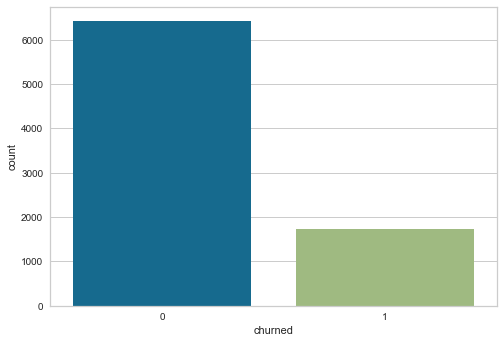

In [600]:
# Visualize the count of customer churn::
sns.countplot(df['churned'])

In [601]:
# What is the percentage of customer that are leaving:
num_reteined = df[df['churned'] == False].shape[0]
num_churned = df[df['churned'] == True].shape[0]

print(num_reteined / (num_reteined + num_churned) * 100, '% customers stayed with the company.')
print(num_churned / (num_reteined + num_churned) * 100, '% customers churned.')

78.65980644370943 % customers stayed with the company.
21.34019355629058 % customers churned.


In [602]:
mrr_reteined = np.where(df['churned'] == False, df['mrr'],0).sum()
mrr_churned = np.where(df['churned'] == True, df['mrr'],0).sum()

print(mrr_reteined / (mrr_reteined + mrr_churned) * 100, '% of MRR stayed with the company.')
print(mrr_churned / (mrr_reteined + mrr_churned) * 100, '% of MRR churned.')

77.09008638709751 % of MRR stayed with the company.
22.909913612902496 % of MRR churned.


array([<AxesSubplot:title={'center':'subscription_length_36_mths'}>,
       <AxesSubplot:title={'center':'subscription_length_12_mths'}>,
       <AxesSubplot:title={'center':'subscription_length_1_mths'}>],
      dtype=object)

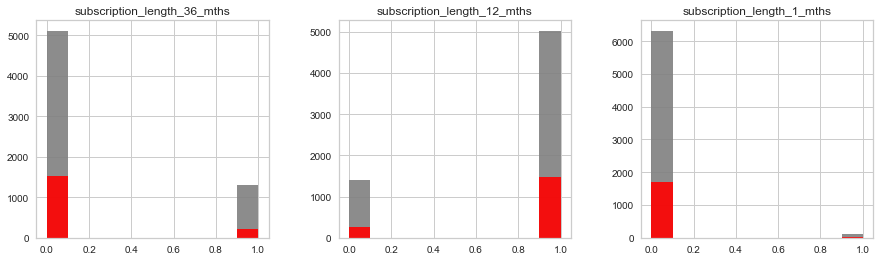

In [610]:
features = ['subscription_length_36_mths', 'subscription_length_12_mths','subscription_length_1_mths']
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
df[df['churned'] == 0][features].hist(bins=10, color="grey", alpha=0.9, ax=ax)
df[df['churned'] == 1][features].hist(bins=10, color="red", alpha=0.9, ax=ax)


# Visualize the count of customer churn::
# sns.countplot(x ='subscription_length_36_mths', hue = "churned", data = df)
# sns.countplot(x ='subscription_length_12_mths', hue = "churned", data = df)
# sns.countplot(x ='subscription_length_1_mths', hue = "churned", data = df)
# sns.countplot(x ='billing_every_12_mths', hue = "churned", data = df)
# sns.countplot(x ='billing_every_3_mths', hue = "churned", data = df)
# sns.countplot(x ='billing_every_1_mths', hue = "churned", data = df)
# sns.countplot(x ='discount', hue = "churned", data = df)

<AxesSubplot:xlabel='tenure_days', ylabel='mrr'>

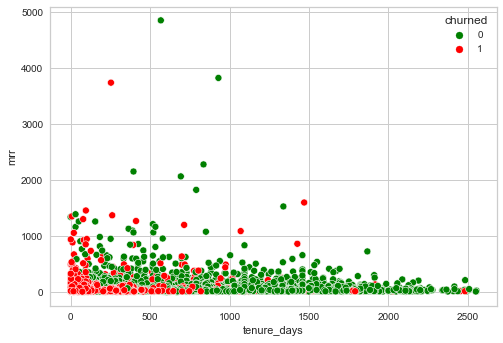

In [611]:
sns.scatterplot(data=df, x="tenure_days", y="mrr", hue="churned", palette=['green','red'])

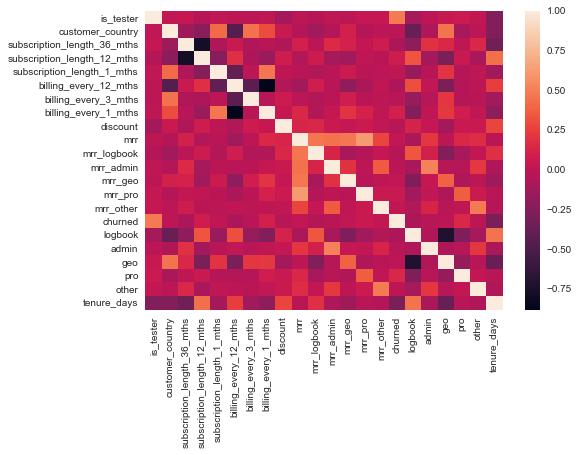

In [612]:
sns.heatmap(df.corr());

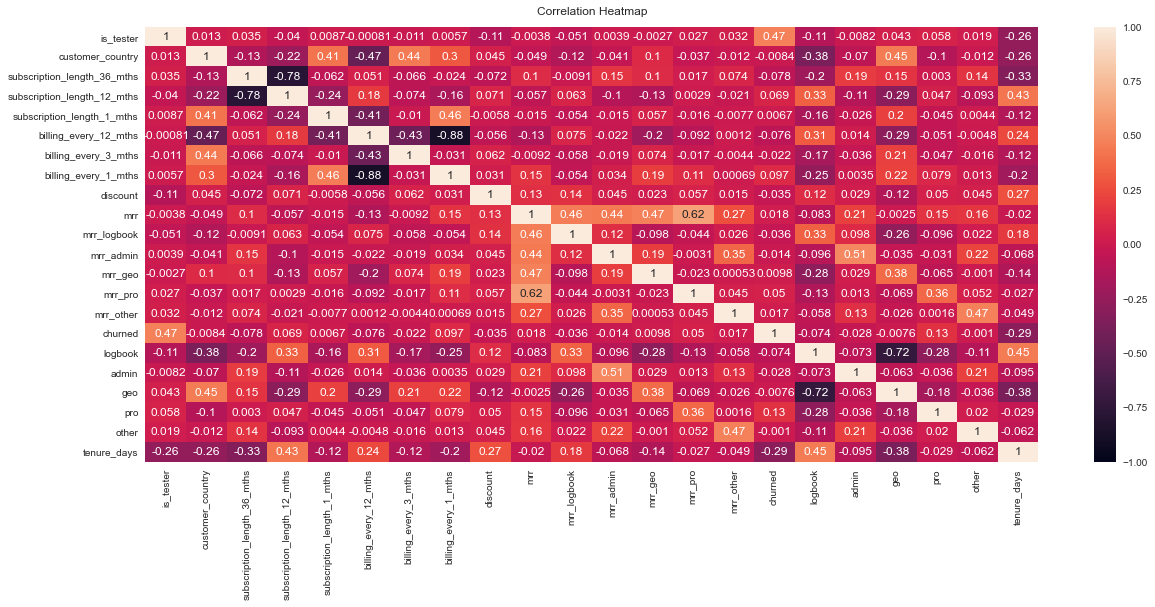

In [613]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 8))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='churned', ylabel='count'>

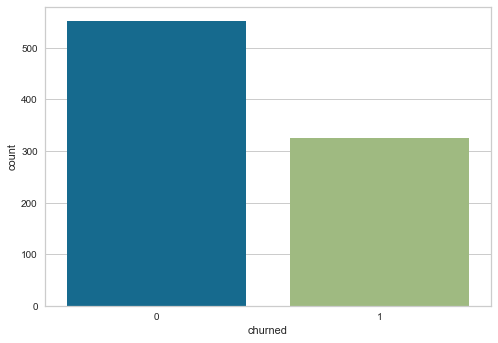

In [614]:
# Pro licenses customers:
df_pro = df[df['pro'] == 1]
sns.countplot(df_pro['churned'])

In [616]:
# Get the numerical columns:
num_cols = df._get_numeric_data().columns
num_cols

Index(['is_tester', 'customer_country', 'subscription_length_36_mths',
       'subscription_length_12_mths', 'subscription_length_1_mths',
       'billing_every_12_mths', 'billing_every_3_mths', 'billing_every_1_mths',
       'discount', 'mrr', 'mrr_logbook', 'mrr_admin', 'mrr_geo', 'mrr_pro',
       'mrr_other', 'churned', 'logbook', 'admin', 'geo', 'pro', 'other',
       'tenure_days'],
      dtype='object')

<AxesSubplot:>

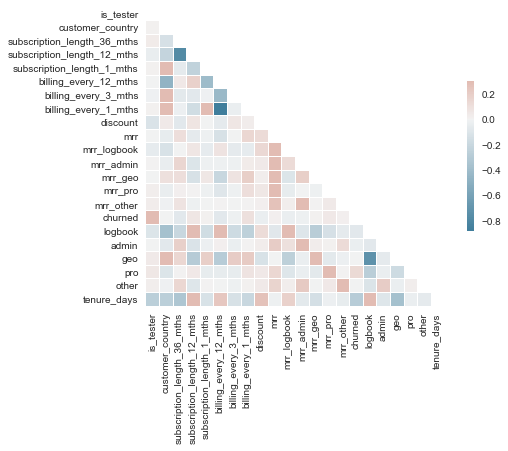

In [617]:
df_categorical = df[num_cols]

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_categorical.corr(), dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_categorical.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Cleaned / ML

In [628]:
df_cleaned = df[['is_tester', 'customer_country',
       'subscription_length_36_mths', 'subscription_length_12_mths',
       'subscription_length_1_mths', 'billing_every_12_mths',
       'billing_every_3_mths', 'billing_every_1_mths', 'discount', 'mrr',
       'mrr_logbook', 'mrr_admin', 'mrr_geo', 'mrr_pro', 'mrr_other',
       'churned', 'logbook', 'admin', 'geo', 'pro', 'other', 'tenure_days']]

df_cleaned.head()

,is_tester,customer_country,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_3_mths,billing_every_1_mths,discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other,churned,logbook,admin,geo,pro,other,tenure_days
0,0,1,0,1,0,1,0,0,1,42.93,42.93,0.0,0.00,0.0,0.0,0,1,0,0,0,0,1794
1,0,1,0,1,0,1,0,0,0,31.80,31.80,0.0,0.00,0.0,0.0,1,1,0,0,0,0,1069
2,0,1,0,1,0,1,0,0,1,40.55,40.55,0.0,0.00,0.0,0.0,1,1,0,0,0,0,1698
3,0,1,0,1,0,1,0,0,1,57.24,57.24,0.0,0.00,0.0,0.0,1,1,0,0,0,0,63
4,0,1,0,1,0,1,0,0,1,35.45,13.52,0.0,21.93,0.0,0.0,0,1,0,1,0,0,1668


In [629]:
df_cleaned.describe()

,is_tester,customer_country,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_3_mths,billing_every_1_mths,discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other,churned,logbook,admin,geo,pro,other,tenure_days
count,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.00000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000
mean,0.059659,1.085508,0.187921,0.796643,0.016171,0.910572,0.018253,0.072155,0.53032,64.090496,29.717654,4.816640,16.780080,11.297888,1.478235,0.213402,0.616808,0.076442,0.300012,0.107558,0.024991,647.073135
std,0.236869,0.284431,0.390673,0.402520,0.126139,0.285378,0.133873,0.258760,0.49911,139.380487,70.060531,33.136371,67.903789,89.962738,19.472236,0.409734,0.486194,0.265721,0.458291,0.309841,0.156107,517.534403
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,16.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,215.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,31.800000,15.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,533.000000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.00000,61.280000,31.800000,0.000000,12.900000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1010.000000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,4858.010000,1848.380000,949.620000,3057.310000,4710.530000,855.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2555.000000


In [630]:
# Convert all of the non-numeric columns to numeric:
df_cleaned[column] = LabelEncoder().fit_transform(df_cleaned[column])

In [634]:
df_cleaned

,is_tester,customer_country,subscription_length_36_mths,subscription_length_12_mths,subscription_length_1_mths,billing_every_12_mths,billing_every_3_mths,billing_every_1_mths,discount,mrr,mrr_logbook,mrr_admin,mrr_geo,mrr_pro,mrr_other,churned,logbook,admin,geo,pro,other,tenure_days
0,0,1,0,1,0,1,0,0,1,42.93,42.93,0.0,0.00,0.00,0.0,0,1,0,0,0,0,1457
1,0,1,0,1,0,1,0,0,0,31.80,31.80,0.0,0.00,0.00,0.0,1,1,0,0,0,0,974
2,0,1,0,1,0,1,0,0,1,40.55,40.55,0.0,0.00,0.00,0.0,1,1,0,0,0,0,1401
3,0,1,0,1,0,1,0,0,1,57.24,57.24,0.0,0.00,0.00,0.0,1,1,0,0,0,0,64
4,0,1,0,1,0,1,0,0,1,35.45,13.52,0.0,21.93,0.00,0.0,0,1,0,1,0,0,1382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8158,1,1,0,1,0,0,0,1,1,103.05,0.00,0.0,0.00,103.05,0.0,1,0,0,0,1,0,9
8159,1,1,0,1,0,1,0,0,0,22.90,0.00,0.0,0.00,22.90,0.0,1,0,0,0,1,0,1
8160,1,1,0,1,0,1,0,0,0,15.90,15.90,0.0,0.00,0.00,0.0,1,1,0,0,0,0,18
8161,1,1,0,1,0,0,0,1,1,330.91,0.00,0.0,0.00,330.91,0.0,1,0,0,0,1,0,1


### Split features and target:

In [639]:
X = df_cleaned.drop('churned', axis=1)  # Features dataset
y = df_cleaned['churned']               # Target dataset

In [640]:
# Scaled the data
X = StandardScaler().fit_transform(X)

In [641]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [642]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6530, 21) (6530,)
(1633, 21) (1633,)


In [ ]:
# Create the model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

In [ ]:
# Create the predictions on the test data
predictions = model.predict(X_test)

print(predictions)

In [ ]:
# Check the precision, recall, f1-score
print(classification_report(y_test, predictions))

In [ ]:
cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

In [ ]:
y.value_counts(normalize=True)

In [ ]:
df_pred = pd.DataFrame(model.predict(X_test))
# df_pred[df_pred[0] == 1]
df_pred.shape

In [ ]:
df_X_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(y_test)
# df_out = pd.merge(df_X_test, y_test,  left_index=True, right_index=True)
df_out = pd.merge(df_X_test, df_pred, how='left', left_index=True, right_index=True)
df_out = pd.merge(df_out, df_y_test, how='left', left_index=True, right_index=True)



In [ ]:
df_out

In [ ]:
# Can be removed later, testing only:
df_churned = df_churned.iloc[: , 1:]
df_churned

In [ ]:
# Can be removed later, testing only:
df_piotr_test = df_piotr_test.drop('churned', axis=1) 
predictions_2 = model.predict(df_piotr_test)

print(predictions_2)

In [ ]:
pd.DataFrame(y_train)

In [ ]:
test = StandardScaler().fit_transform(df_churned)
test